RMSE: 531.611778364351
R² Score: -10.74079507952877


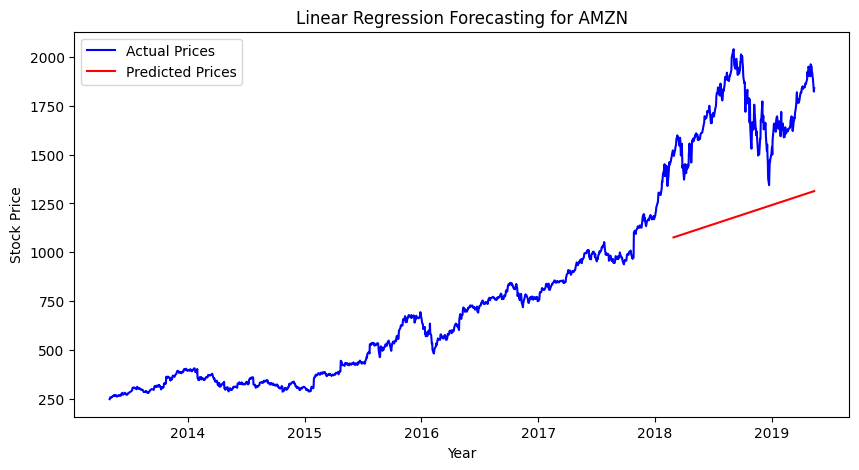

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (Assuming CSV file)
df = pd.read_csv("portfolio_data.csv", parse_dates=["Date"], index_col="Date")

# Feature Engineering: Convert date to numerical values
df["Days"] = (df.index - df.index.min()).days  # Number of days since start

# Select target variable (e.g., forecasting AMZN stock prices)
X = df[["Days"]]
y = df["AMZN"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(df.index, df["AMZN"], label="Actual Prices", color="blue")
plt.plot(X_test.index, y_pred, label="Predicted Prices", color="red")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.title("Linear Regression Forecasting for AMZN")
plt.legend()
plt.show()


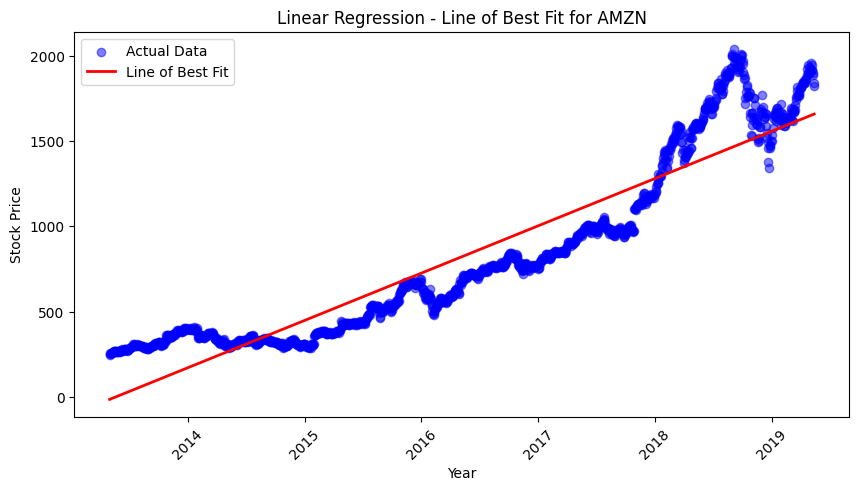

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your dataset (Assuming CSV format)
df = pd.read_csv("portfolio_data.csv", parse_dates=["Date"], index_col="Date")

# Convert dates to numerical values (days since the first date)
df["Days"] = (df.index - df.index.min()).days

# Select the target variable (e.g., AMZN stock prices)
X = df[["Days"]]
y = df["AMZN"]

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predict stock prices (Line of Best Fit)
y_pred = model.predict(X)

# Plot the data and line of best fit
plt.figure(figsize=(10,5))
plt.scatter(df.index, y, label="Actual Data", color="blue", alpha=0.5)
plt.plot(df.index, y_pred, label="Line of Best Fit", color="red", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.title("Linear Regression - Line of Best Fit for AMZN")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
df

,AMZN,DPZ,BTC,NFLX,Days
Date,,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714,0
2013-05-02,252.550003,51.987320,98.099998,30.641428,1
2013-05-03,258.049988,52.446388,112.900002,30.492857,2
2013-05-06,255.720001,53.205257,109.599998,30.098572,5
2013-05-07,257.730011,54.151505,113.199997,29.464285,6
...,...,...,...,...,...
2019-05-08,1917.770020,283.149994,6171.959961,364.369995,2198
2019-05-09,1899.869995,282.160004,6358.290039,362.750000,2199
2019-05-10,1889.979980,278.369995,7191.359863,361.040009,2200


In [ ]:
# prompt: check whether my df conatins nan values

df.isnull().values.any()


False

In [ ]:
# prompt: check whether my df is preprocessed

import pandas as pd

# Assuming 'df' is already defined in your environment from the previous code.
# Check for null values
print("Null values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Check the descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Example: Check if 'Days' column exists and has expected data type
if 'Days' in df.columns and pd.api.types.is_numeric_dtype(df['Days']):
  print("\n'Days' column exists and is numeric.")
else:
  print("\n'Days' column does not exist or is not numeric.")

# Add more checks based on your preprocessing steps. For example, you can check if categorical features are one-hot encoded, etc.


Null values:
 AMZN    0
DPZ     0
BTC     0
NFLX    0
Days    0
dtype: int64

Data types:
 AMZN    float64
DPZ     float64
BTC     float64
NFLX    float64
Days      int64
dtype: object

Number of duplicated rows: 0

Descriptive statistics:
               AMZN          DPZ           BTC         NFLX         Days
count  1520.000000  1520.000000   1520.000000  1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273  1100.766447
std     518.442653    72.192287   3310.894199   107.641486   636.650355
min     248.229996    51.190983     69.660004    29.464285     0.000000
25%     364.360001    84.993593    340.904999    62.851071   547.750000
50%     686.459992   127.168053    625.304993   104.000000  1100.500000
75%    1121.287536   202.454994   3874.912415   192.207496  1650.250000
max    2039.510010   298.635986  18972.320310   418.970001  2204.000000

'Days' column exists and is numeric.
